![tower_bridge](tower_bridge.jpeg)

As the climate changes, predicting the weather becomes ever more important for businesses. Since the weather depends on a lot of different factors, you will want to run a lot of experiments to determine what the best approach is to predict the weather. In this project, you will run experiments for different regression models predicting the mean temperature, using a combination of `sklearn`.

You will be working with data stored in `london_weather.csv`, which contains the following columns:
- **date** - recorded date of measurement - (**int**)
- **cloud_cover** - cloud cover measurement in oktas - (**float**)
- **sunshine** - sunshine measurement in hours (hrs) - (**float**)
- **global_radiation** - irradiance measurement in Watt per square meter (W/m2) - (**float**)
- **max_temp** - maximum temperature recorded in degrees Celsius (°C) - (**float**)
- **mean_temp** - mean temperature in degrees Celsius (°C) - (**float**)
- **min_temp** - minimum temperature recorded in degrees Celsius (°C) - (**float**)
- **precipitation** - precipitation measurement in millimeters (mm) - (**float**)
- **pressure** - pressure measurement in Pascals (Pa) - (**float**)
- **snow_depth** - snow depth measurement in centimeters (cm) - (**float**)

In [1]:
# Run this cell to import the modules you require
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc,accuracy_score
from sklearn.linear_model import LogisticRegression


In [2]:
london_weather = pd.read_csv('london_weather.csv')
london_weather

date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0      19790101          2.0       7.0              52.0       2.3       -4.1   
1      19790102          6.0       1.7              27.0       1.6       -2.6   
2      19790103          5.0       0.0              13.0       1.3       -2.8   
3      19790104          8.0       0.0              13.0      -0.3       -2.6   
4      19790105          6.0       2.0              29.0       5.6       -0.8   
...         ...          ...       ...               ...       ...        ...   
15336  20201227          1.0       0.9              32.0       7.5        7.5   
15337  20201228          7.0       3.7              38.0       3.6        1.1   
15338  20201229          7.0       0.0              21.0       4.1        2.6   
15339  20201230          6.0       0.4              22.0       5.6        2.7   
15340  20201231          7.0       1.3              34.0       1.5       -0.8   

       min_temp  precipitation  pressure  snow_depth  
0          -7.5            0.4  101900.0         9.0  
1          -7.5            0.0  102530.0         8.0  
2          -7.2            0.0  102050.0         4.0  
3          -6.5            0.0  100840.0         2.0  
4          -1.4            0.0  102250.0         1.0  
...         ...            ...       ...         ...  
15336       7.6            2.0   98000.0         NaN  
15337      -1.3            0.2   97370.0         NaN  
15338       1.1            0.0   98830.0         NaN  
15339      -0.1            0.0  100200.0         NaN  
15340      -3.1            0.0  100500.0         NaN  

[15341 rows x 10 columns]

In [3]:
london_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [4]:
london_weather.isna().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [5]:
london_weather[["cloud_cover","global_radiation","mean_temp","max_temp","min_temp","precipitation","pressure","snow_depth"]]=london_weather[["cloud_cover","global_radiation","mean_temp","max_temp","min_temp","precipitation","pressure","snow_depth"]].fillna(0)

In [6]:
london_weather.isna().sum()

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

In [7]:
london_weather["date"]=pd.to_datetime(london_weather["date"],format='%Y%m%d')

In [8]:
london_weather

date  cloud_cover  sunshine  global_radiation  max_temp  \
0     1979-01-01          2.0       7.0              52.0       2.3   
1     1979-01-02          6.0       1.7              27.0       1.6   
2     1979-01-03          5.0       0.0              13.0       1.3   
3     1979-01-04          8.0       0.0              13.0      -0.3   
4     1979-01-05          6.0       2.0              29.0       5.6   
...          ...          ...       ...               ...       ...   
15336 2020-12-27          1.0       0.9              32.0       7.5   
15337 2020-12-28          7.0       3.7              38.0       3.6   
15338 2020-12-29          7.0       0.0              21.0       4.1   
15339 2020-12-30          6.0       0.4              22.0       5.6   
15340 2020-12-31          7.0       1.3              34.0       1.5   

       mean_temp  min_temp  precipitation  pressure  snow_depth  
0           -4.1      -7.5            0.4  101900.0         9.0  
1           -2.6      -7.5            0.0  102530.0         8.0  
2           -2.8      -7.2            0.0  102050.0         4.0  
3           -2.6      -6.5            0.0  100840.0         2.0  
4           -0.8      -1.4            0.0  102250.0         1.0  
...          ...       ...            ...       ...         ...  
15336        7.5       7.6            2.0   98000.0         0.0  
15337        1.1      -1.3            0.2   97370.0         0.0  
15338        2.6       1.1            0.0   98830.0         0.0  
15339        2.7      -0.1            0.0  100200.0         0.0  
15340       -0.8      -3.1            0.0  100500.0         0.0  

[15341 rows x 10 columns]

In [9]:
years_list = [dta.year for dta in london_weather['date']]

In [10]:
london_weather['years'] = years_list

In [11]:
london_weather

date  cloud_cover  sunshine  global_radiation  max_temp  \
0     1979-01-01          2.0       7.0              52.0       2.3   
1     1979-01-02          6.0       1.7              27.0       1.6   
2     1979-01-03          5.0       0.0              13.0       1.3   
3     1979-01-04          8.0       0.0              13.0      -0.3   
4     1979-01-05          6.0       2.0              29.0       5.6   
...          ...          ...       ...               ...       ...   
15336 2020-12-27          1.0       0.9              32.0       7.5   
15337 2020-12-28          7.0       3.7              38.0       3.6   
15338 2020-12-29          7.0       0.0              21.0       4.1   
15339 2020-12-30          6.0       0.4              22.0       5.6   
15340 2020-12-31          7.0       1.3              34.0       1.5   

       mean_temp  min_temp  precipitation  pressure  snow_depth  years  
0           -4.1      -7.5            0.4  101900.0         9.0   1979  
1           -2.6      -7.5            0.0  102530.0         8.0   1979  
2           -2.8      -7.2            0.0  102050.0         4.0   1979  
3           -2.6      -6.5            0.0  100840.0         2.0   1979  
4           -0.8      -1.4            0.0  102250.0         1.0   1979  
...          ...       ...            ...       ...         ...    ...  
15336        7.5       7.6            2.0   98000.0         0.0   2020  
15337        1.1      -1.3            0.2   97370.0         0.0   2020  
15338        2.6       1.1            0.0   98830.0         0.0   2020  
15339        2.7      -0.1            0.0  100200.0         0.0   2020  
15340       -0.8      -3.1            0.0  100500.0         0.0   2020  

[15341 rows x 11 columns]

In [12]:
month_list=[dta.month for dta in london_weather['date']]

In [13]:
london_weather['Month']=month_list

In [14]:
import calendar
def get_month_name(month_num):
    return calendar.month_abbr[month_num]
london_weather['Month'] = london_weather['Month'].apply(get_month_name)
print(london_weather)

            date  cloud_cover  sunshine  global_radiation  max_temp  \
0     1979-01-01          2.0       7.0              52.0       2.3   
1     1979-01-02          6.0       1.7              27.0       1.6   
2     1979-01-03          5.0       0.0              13.0       1.3   
3     1979-01-04          8.0       0.0              13.0      -0.3   
4     1979-01-05          6.0       2.0              29.0       5.6   
...          ...          ...       ...               ...       ...   
15336 2020-12-27          1.0       0.9              32.0       7.5   
15337 2020-12-28          7.0       3.7              38.0       3.6   
15338 2020-12-29          7.0       0.0              21.0       4.1   
15339 2020-12-30          6.0       0.4              22.0       5.6   
15340 2020-12-31          7.0       1.3              34.0       1.5   

       mean_temp  min_temp  precipitation  pressure  snow_depth  years Month  
0           -4.1      -7.5            0.4  101900.0         9.0   19

C:\Users\itsla\AppData\Local\Temp\ipykernel_35112\543239492.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = london_weather.corr()


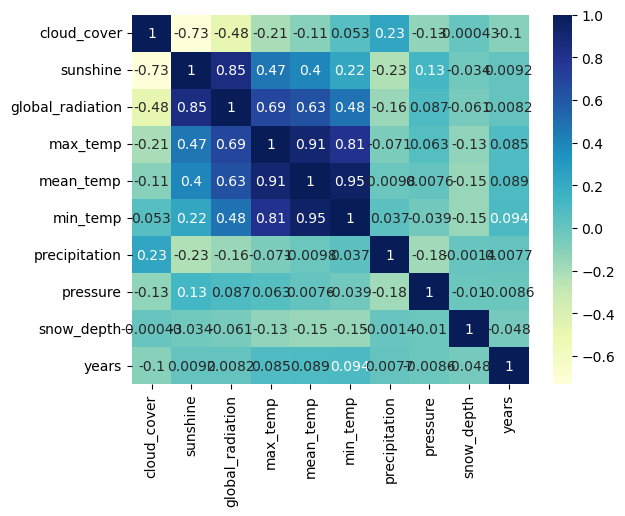

In [15]:
corr_matrix = london_weather.corr()
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True)
plt.show()


In [16]:
london_weather.columns

Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth',
       'years', 'Month'],
      dtype='object')

In [18]:
london_weather.describe()

cloud_cover      sunshine  global_radiation      max_temp  \
count  15341.000000  15341.000000      15341.000000  15341.000000   
mean       5.261717      4.350238        118.609869     15.382759   
std        2.077071      4.028339         88.941333      6.560532   
min        0.000000      0.000000          0.000000     -6.200000   
25%        4.000000      0.500000         41.000000     10.500000   
50%        6.000000      3.500000         95.000000     15.000000   
75%        7.000000      7.200000        186.000000     20.300000   
max        9.000000     16.000000        402.000000     37.900000   

          mean_temp      min_temp  precipitation       pressure    snow_depth  \
count  15341.000000  15341.000000   15341.000000   15341.000000  15341.000000   
mean      11.448582      7.558881       1.667981  101510.131021      0.034418   
std        5.749855      5.327108       3.737954    1946.597741      0.519491   
min       -7.600000    -11.800000       0.000000       0.000000      0.000000   
25%        7.000000      3.500000       0.000000  100920.000000      0.000000   
50%       11.400000      7.800000       0.000000  101620.000000      0.000000   
75%       16.000000     11.800000       1.600000  102240.000000      0.000000   
max       29.000000     22.300000      61.800000  104820.000000     22.000000   

              years  
count  15341.000000  
mean    1999.500359  
std       12.121708  
min     1979.000000  
25%     1989.000000  
50%     2000.000000  
75%     2010.000000  
max     2020.000000

In [19]:
y.describe()

cloud_cover      sunshine
count  15341.000000  15341.000000
mean       5.261717      4.350238
std        2.077071      4.028339
min        0.000000      0.000000
25%        4.000000      0.500000
50%        6.000000      3.500000
75%        7.000000      7.200000
max        9.000000     16.000000

In [21]:
london_clouds = dict()
london_clouds['Barely cloudy'] = london_weather['cloud_cover'][london_weather['cloud_cover'].isin([0,1,2])].count()
london_clouds['Partly cloudy'] = london_weather['cloud_cover'][london_weather['cloud_cover'].isin([3,4,5])].count()
london_clouds['Mostly cloudy'] = london_weather['cloud_cover'][london_weather['cloud_cover'].isin([6,7,8])].count()
london_clouds['Obstructed view'] = london_weather['cloud_cover'][london_weather['cloud_cover'] == 9].count()

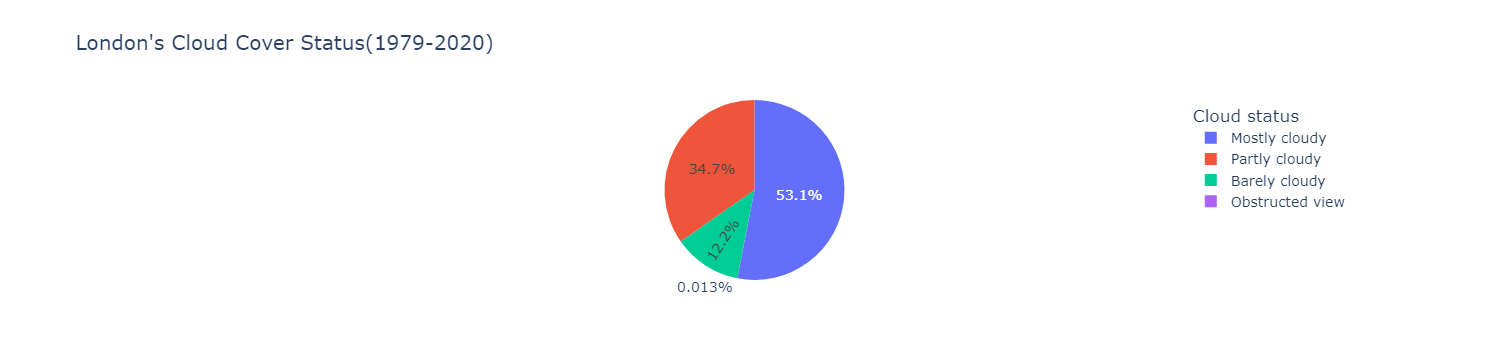

In [22]:
fig = px.pie(values=list(london_clouds.values()), names=list(london_clouds.keys()), 
              title = "London's Cloud Cover Status(1979-2020)")
fig.update_layout(width = 700, legend_title_text = 'Cloud status', font = dict(size = 14))
fig.show()

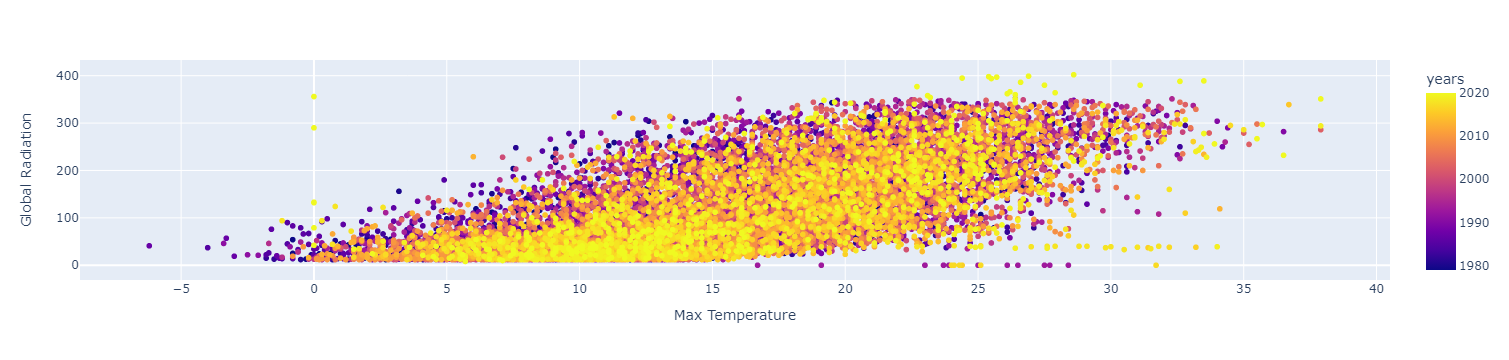

In [23]:
fig = px.scatter(london_weather, x='max_temp', y='global_radiation', color='years')

#Add labels for the axes
fig.update_xaxes(title_text='Max Temperature') 
fig.update_yaxes(title_text='Global Radiation')

#Show the plot
fig.show()

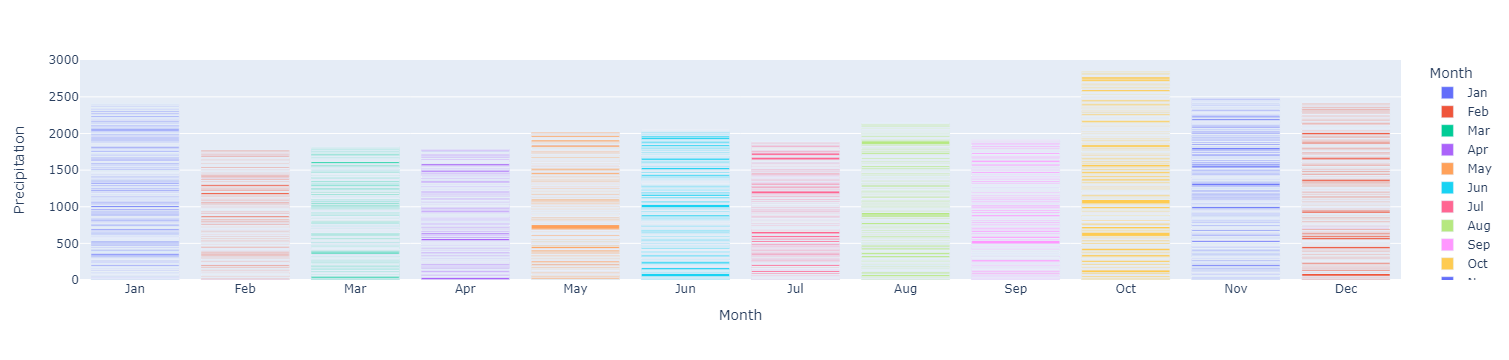

In [24]:
fig = px.bar(london_weather, x='Month', y='precipitation', color='Month')

#Add labels for the axes
fig.update_xaxes(title_text='Month') 
fig.update_yaxes(title_text='Precipitation')

#Show the plot
fig.show()

In [25]:
london_weather.groupby(['Month', 'sunshine'])

In [26]:

london_csv=london_weather.groupby("Month", group_keys=True).apply(lambda x: x)

In [27]:
mts = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y_final = []
x_final = []
for i in mts:
    y_temp = london_csv[london_csv['Month'] == i]
    y_final.append(y_temp['sunshine'])
    x_final.append(y_temp['years'])

In [28]:
london_csv

date  cloud_cover  sunshine  global_radiation  max_temp  \
Month                                                                       
Apr   90    1979-04-01          6.0       2.7             112.0       8.3   
      91    1979-04-02          5.0       3.4             124.0       8.6   
      92    1979-04-03          5.0       3.1             121.0       7.9   
      93    1979-04-04          4.0       2.7             116.0       8.0   
      94    1979-04-05          6.0       2.1             107.0       7.9   
...                ...          ...       ...               ...       ...   
Sep   15244 2020-09-26          4.0       6.2             164.0      13.6   
      15245 2020-09-27          7.0       5.0             146.0      14.6   
      15246 2020-09-28          3.0       1.6              92.0      18.2   
      15247 2020-09-29          5.0       5.8             156.0      19.6   
      15248 2020-09-30          7.0       4.0             130.0      18.1   

             mean_temp  min_temp  precipitation  pressure  snow_depth  years  \
Month                                                                          
Apr   90           8.0       4.5            2.8  100890.0         0.0   1979   
      91           4.4       0.5            3.0  100240.0         0.0   1979   
      92           3.8      -1.1            0.0   99910.0         0.0   1979   
      93           4.0       0.0            0.0  100270.0         0.0   1979   
      94           4.0       0.0            0.1  100920.0         0.0   1979   
...                ...       ...            ...       ...         ...    ...   
Sep   15244       10.1       6.6            0.0  101110.0         0.0   2020   
      15245       12.6      10.6            0.0  101260.0         0.0   2020   
      15246       13.2       8.2            2.0  101360.0         0.0   2020   
      15247       17.1      14.7            0.2  101490.0         0.0   2020   
      15248       14.1      10.2            3.0  100870.0         0.0   2020   

            Month  
Month              
Apr   90      Apr  
      91      Apr  
      92      Apr  
      93      Apr  
      94      Apr  
...           ...  
Sep   15244   Sep  
      15245   Sep  
      15246   Sep  
      15247   Sep  
      15248   Sep  

[15341 rows x 12 columns]

11


C:\ProgramData\anaconda3\Lib\site-packages\plotly\graph_objs\_deprecations.py:572: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


C:\ProgramData\anaconda3\Lib\site-packages\plotly\graph_objs\_deprecations.py:544: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis


C:\ProgramData\anaconda3\Lib\site-packages\plotly\graph_objs\_deprecations.py:322: DeprecationWarning:

plotly.graph_objs.Font is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Font
  - plotly.graph_objs.layout.hoverlabel.Font
  - etc.


C:\ProgramData\anaconda3\Lib\site-packages\plotly\graph_objs\_deprecations.py:143: DeprecationWarning:

plotly.graph_objs.Annotation i

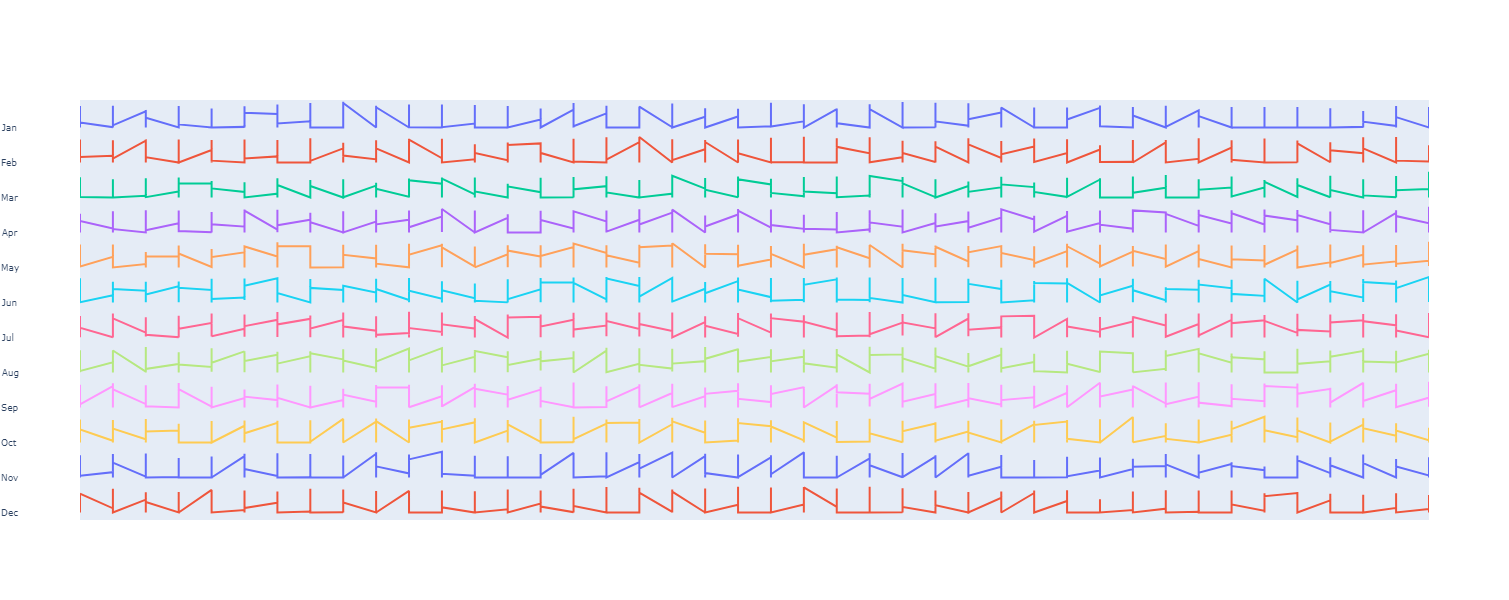

In [29]:
from plotly import tools
from plotly.graph_objs import Layout, YAxis, XAxis,Scatter, Annotation, Annotations, Data, Figure, Marker, Font
import mne
import py
import plotly
import plotly.graph_objs as go
from plotly.offline import *

ch_names = mts

n_channels = 12
step = 1. / n_channels
kwargs = dict(domain=[1 - step, 1], showticklabels=False, zeroline=False, showgrid=False)
kwargsx = dict(showticklabels=False, zeroline=False, showgrid=False)
layout = Layout(yaxis=YAxis(kwargs),xaxis=XAxis(kwargsx),showlegend=False)


# create objects for layout and traces

traces = [Scatter(x=x_final[0].to_numpy(), y=y_final[0].to_numpy())]

# loop over the channels
for ii in range(1, n_channels):
        kwargs.update(domain=[1 - (ii + 1) * step, 1 - ii * step])
        layout.update({'yaxis%d' % (ii + 1): YAxis(kwargs), 'showlegend': False})
        if ii==n_channels-1:
            print(ii)
            layout.update({'xaxis%d' % (ii + 1): XAxis(dict(showticklabels=True)), 'showlegend': False})
        traces.append(Scatter(x=x_final[ii].to_numpy(),y=y_final[ii].to_numpy(), yaxis='y%d' % (ii + 1)))

# add channel names using Annotations
annotations = Annotations([Annotation(x=-0.06, y=0, xref='paper', yref='y%d' % (ii + 1),
                                      text=ch_name, font=Font(size=9), showarrow=False)
                          for ii, ch_name in enumerate(ch_names)])
layout.update(annotations=annotations)

# set the size of the figure and plot it
layout.update(autosize=False, width=1000, height=600)
fig = Figure(data=Data(traces), layout=layout)
fig.show()

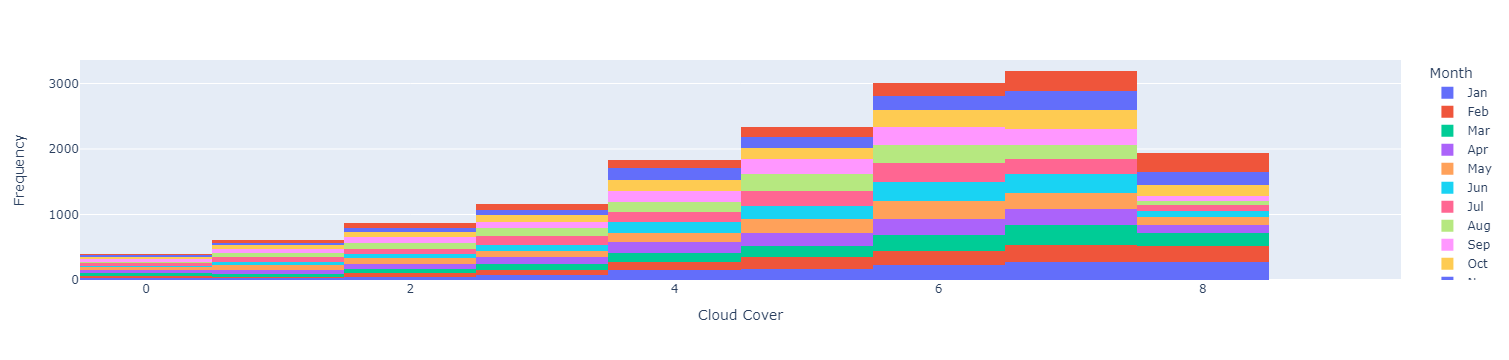

In [31]:
fig = px.histogram(london_weather, x='cloud_cover', color='Month')
#Add labels for the axes
fig.update_xaxes(title_text='Cloud Cover') 
fig.update_yaxes(title_text='Frequency')

#Show the plot
fig.show()

['High Pressure', 'Low Pressure']
Categories (2, object): ['Low Pressure' < 'High Pressure']


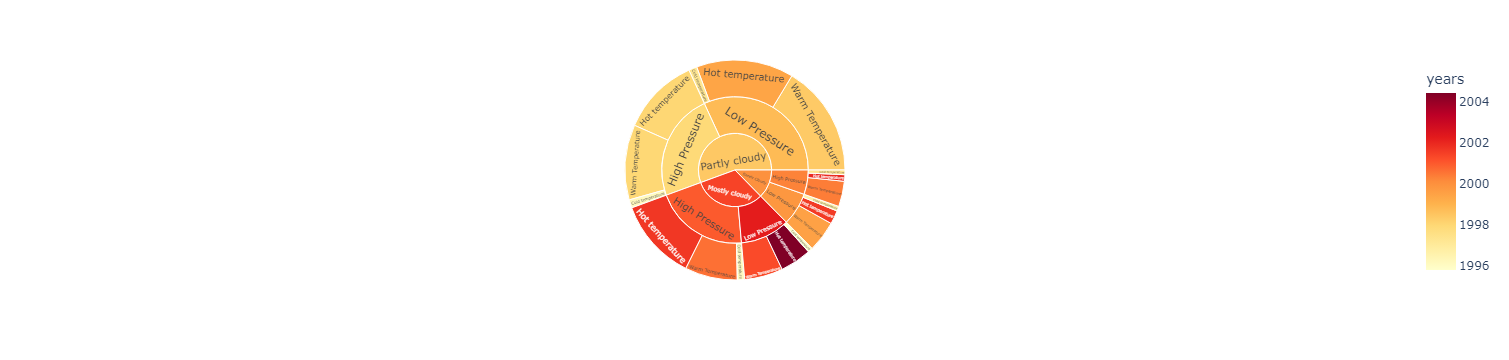

In [32]:
# Define the bins and labels for cloud cover categories
bins = [-10., 4., 7., 20.]
labels = ['Mostly cloudy', 'Partly cloudy', 'Barely Cloudy']

# Create a new column 'cloud_category' in the london_weather dataframe based on cloud cover values
london_weather['cloud_category'] = pd.cut(london_weather['cloud_cover'], bins=bins, labels=labels)

# Print the unique values in the 'cloud_category' column
london_weather['cloud_category'].unique()

bins = [-10., london_weather["pressure"].quantile(0.5), london_weather["pressure"].max() + 1]
labels = ['Low Pressure', 'High Pressure']

# Create new column with categories based on cloud cover values
london_weather['pressure_category'] = pd.cut(london_weather['pressure'], bins=bins, labels=labels)

# Print the first 5 rows of the dataframe
print(london_weather['pressure_category'].unique())

# Define the bins and labels for temperature categories
bins = [-10., london_weather["min_temp"].quantile(0.35), london_weather["mean_temp"].quantile(0.75), london_weather["max_temp"].max() + 1]
labels = ['Cold temperature', 'Warm Temperature', 'Hot temperature']

# Create a new column 'temperature_category' in the london_weather dataframe based on max temperature values
london_weather['temperature_category'] = pd.cut(london_weather['max_temp'], bins=bins, labels=labels)

# Print the unique values in the 'temperature_category' column
london_weather['temperature_category'].unique()

# Create a new dataframe with the count of each combination of categories
category_counts = london_weather.groupby(['cloud_category', 'pressure_category', 'temperature_category']).size().reset_index(name='years')

# Sort the dataframe by count in descending order
category_counts = category_counts.sort_values('years', ascending=False)

fig = px.sunburst(london_weather, path=['cloud_category', 'pressure_category', 'temperature_category'], values='years',
                  color='years', color_continuous_scale='YlOrRd')
fig.show()

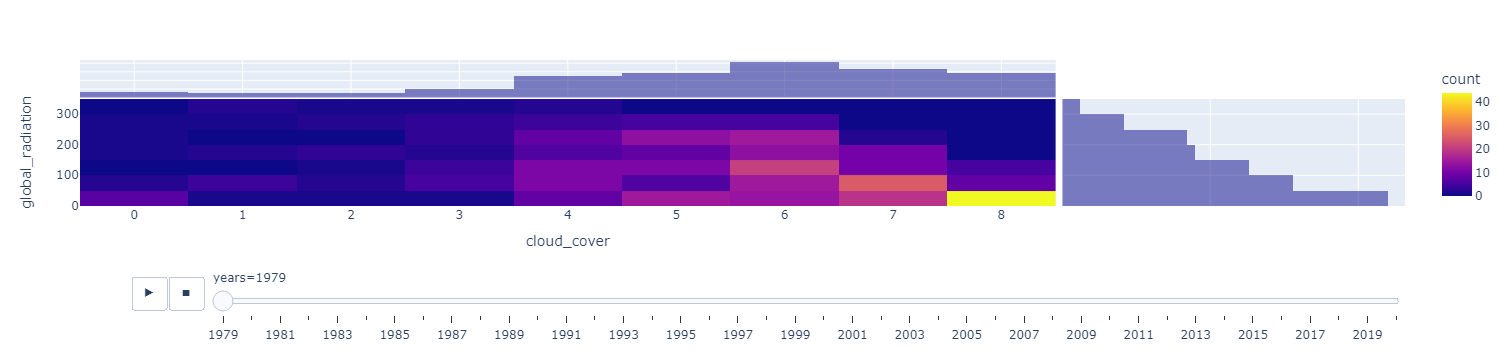

In [33]:
fig = px.density_heatmap(london_weather, x="cloud_cover", y="global_radiation",
  animation_frame="years", animation_group="sunshine", marginal_x="histogram", marginal_y="histogram")
fig.show()

In [34]:
#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'cloud_category' column
london_weather['cloud_category'] = lab.fit_transform(london_weather['cloud_category'])

In [43]:
london_weather[["cloud_category"]]

cloud_category
0                   1
1                   2
2                   2
3                   0
4                   2
...               ...
15336               1
15337               2
15338               2
15339               2
15340               2

[15341 rows x 1 columns]

In [68]:
X.drop(columns=['Month'])

global_radiation  max_temp  mean_temp  min_temp  precipitation  \
0                  52.0       2.3       -4.1      -7.5            0.4   
1                  27.0       1.6       -2.6      -7.5            0.0   
2                  13.0       1.3       -2.8      -7.2            0.0   
3                  13.0      -0.3       -2.6      -6.5            0.0   
4                  29.0       5.6       -0.8      -1.4            0.0   
...                 ...       ...        ...       ...            ...   
15336              32.0       7.5        7.5       7.6            2.0   
15337              38.0       3.6        1.1      -1.3            0.2   
15338              21.0       4.1        2.6       1.1            0.0   
15339              22.0       5.6        2.7      -0.1            0.0   
15340              34.0       1.5       -0.8      -3.1            0.0   

       pressure  snow_depth  years  
0      101900.0         9.0   1979  
1      102530.0         8.0   1979  
2      102050.0         4.0   1979  
3      100840.0         2.0   1979  
4      102250.0         1.0   1979  
...         ...         ...    ...  
15336   98000.0         0.0   2020  
15337   97370.0         0.0   2020  
15338   98830.0         0.0   2020  
15339  100200.0         0.0   2020  
15340  100500.0         0.0   2020  

[15341 rows x 8 columns]

In [76]:
X=london_weather[['global_radiation', 'max_temp','mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth','years','Month']]
y=london_weather[['cloud_category']]

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y.iloc[:,0], test_size=0.2, random_state=42)

# Model DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)  # Fit the model to the training data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')  # Update the average parameter as needed
recall = recall_score(y_test, y_pred, average='micro')  # Update the average parameter as needed
f1 = f1_score(y_test, y_pred, average='micro')  # Update the average parameter as needed
confusion = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.645487129358097
Precision: 0.645487129358097
Recall: 0.645487129358097
F1 Score: 0.645487129358097


In [78]:
# Model RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)  # Fit the model to the training data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')  # Update the average parameter as needed
recall = recall_score(y_test, y_pred, average='micro')  # Update the average parameter as needed
f1 = f1_score(y_test, y_pred, average='micro')  # Update the average parameter as needed
confusion = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.7236884978820463
Precision: 0.7236884978820463
Recall: 0.7236884978820463
F1 Score: 0.7236884978820463


In [79]:
# Model KneighbourClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)  # Fit the model to the training data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')  # Update the average parameter as needed
recall = recall_score(y_test, y_pred, average='micro')  # Update the average parameter as needed
f1 = f1_score(y_test, y_pred, average='micro')  # Update the average parameter as needed
confusion = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")



Accuracy: 0.5959595959595959
Precision: 0.5959595959595959
Recall: 0.5959595959595959
F1 Score: 0.5959595959595959


In [84]:

# Random Forest
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)

In [85]:

# KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)

In [86]:

# Decision tere
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)

In [87]:
# Confusion Matrix for Random Forest

rf_cm = confusion_matrix(y_test, rf_predictions)
print("Confusion Matrix for Random Forest:")
print(rf_cm)

Confusion Matrix for Random Forest:
[[ 159   11  210]
 [  11  695  285]
 [ 128  287 1283]]


In [88]:

# Confusion Matrix for KNN
knn_cm = confusion_matrix(y_test, knn_predictions)
print("Confusion Matrix for KNN:")
print(knn_cm)

Confusion Matrix for KNN:
[[  64   17  299]
 [  17  508  466]
 [ 106  274 1318]]


In [89]:
# Confusion Matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt_predictions)
print("Confusion Matrix for Decision Tree:")
print(dt_cm)

Confusion Matrix for Decision Tree:
[[ 170   11  199]
 [  15  652  324]
 [ 206  318 1174]]


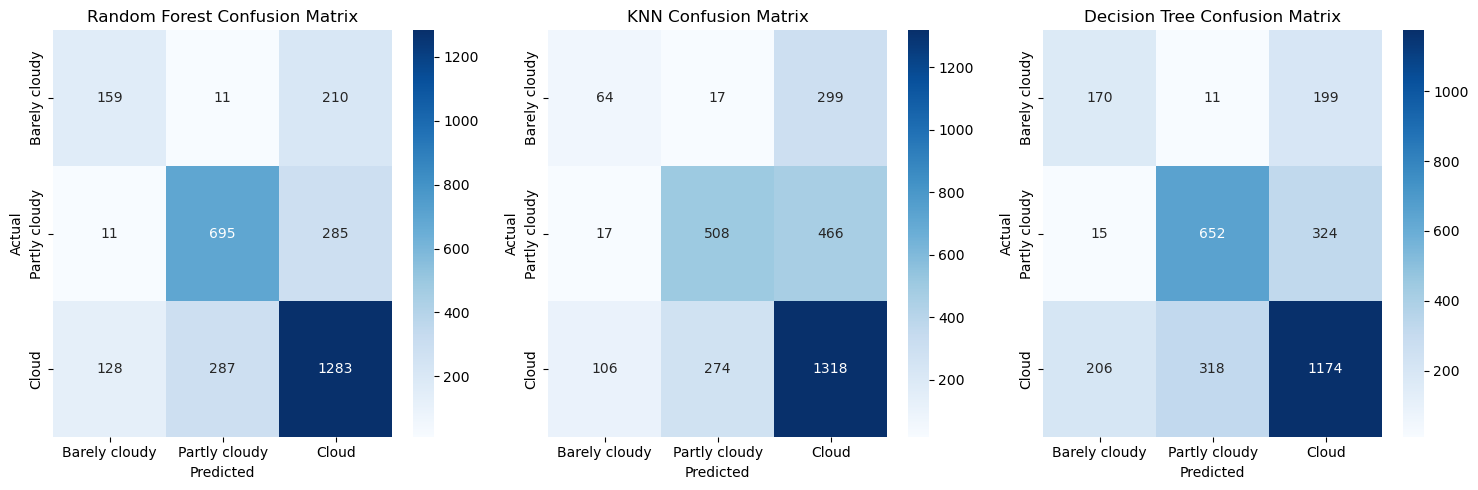

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
labels = ['Barely cloudy', 'Partly cloudy', 'Cloud']

sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(labels)
axes[0].set_yticklabels(labels)

sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('KNN Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_xticklabels(labels)
axes[1].set_yticklabels(labels)

sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Decision Tree Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
axes[2].set_xticklabels(labels)
axes[2].set_yticklabels(labels)

plt.tight_layout()
plt.show()


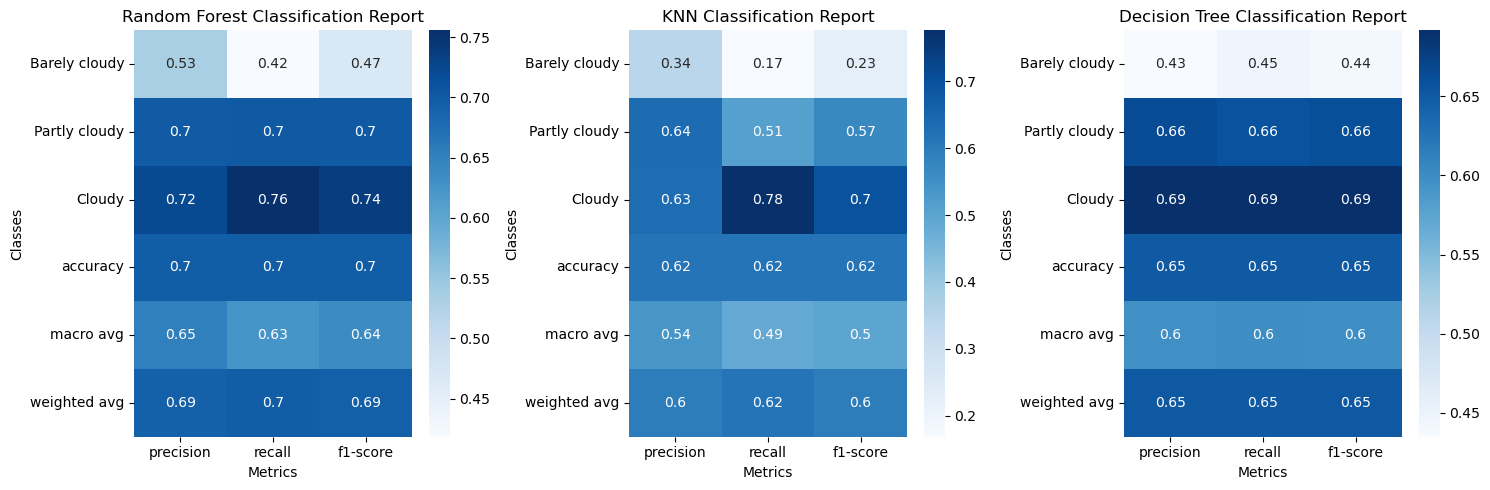

In [91]:
# Classification Report for Random Forest
rf_report = classification_report(y_test, rf_predictions)

# Classification Report for KNN
knn_report = classification_report(y_test, knn_predictions)

# Classification Report for Decision Tree
dt_report = classification_report(y_test, dt_predictions)

# Visualization of Classification Reports
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(pd.DataFrame(classification_report(y_test, rf_predictions, output_dict=True,target_names=['Barely cloudy', 'Partly cloudy', 'Cloudy'])).iloc[:-1, :].T,annot=True, cmap='Blues', ax=axes[0])
axes[0].set_title('Random Forest Classification Report')
axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('Classes')

sns.heatmap(pd.DataFrame(classification_report(y_test, knn_predictions, output_dict=True,target_names=['Barely cloudy', 'Partly cloudy', 'Cloudy'])).iloc[:-1, :].T, annot=True, cmap='Blues', ax=axes[1])
axes[1].set_title('KNN Classification Report')
axes[1].set_xlabel('Metrics')
axes[1].set_ylabel('Classes')

sns.heatmap(pd.DataFrame(classification_report(y_test, dt_predictions, output_dict=True,target_names=['Barely cloudy', 'Partly cloudy', 'Cloudy'])).iloc[:-1, :].T, annot=True, cmap='Blues', ax=axes[2])
axes[2].set_title('Decision Tree Classification Report')
axes[2].set_xlabel('Metrics')
axes[2].set_ylabel('Classes')

plt.tight_layout()
plt.show()

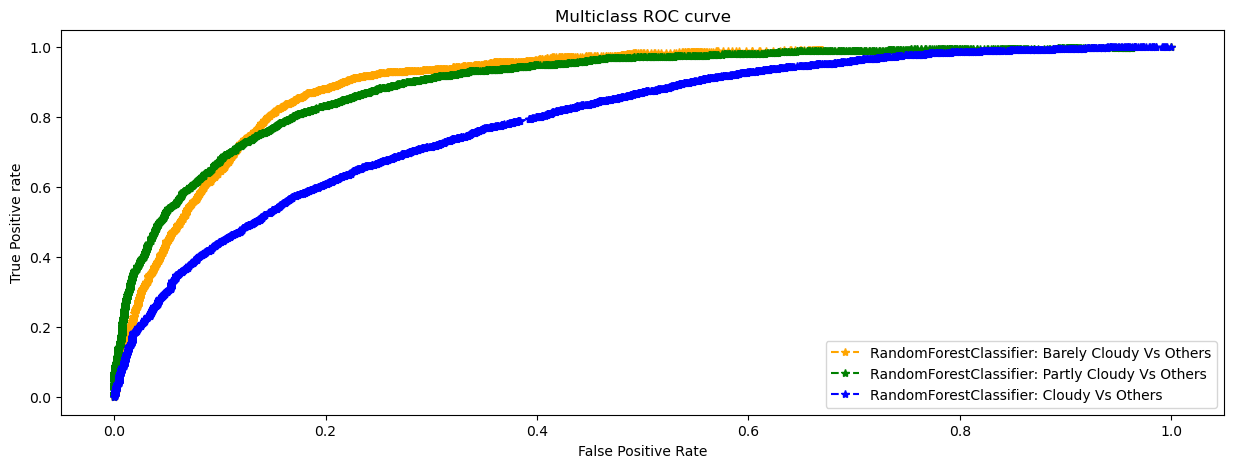

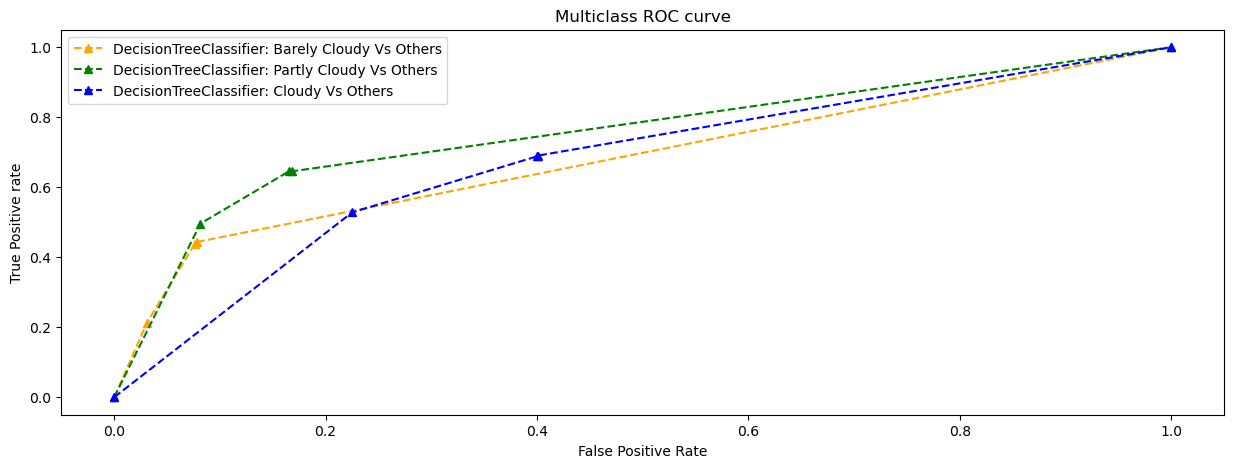

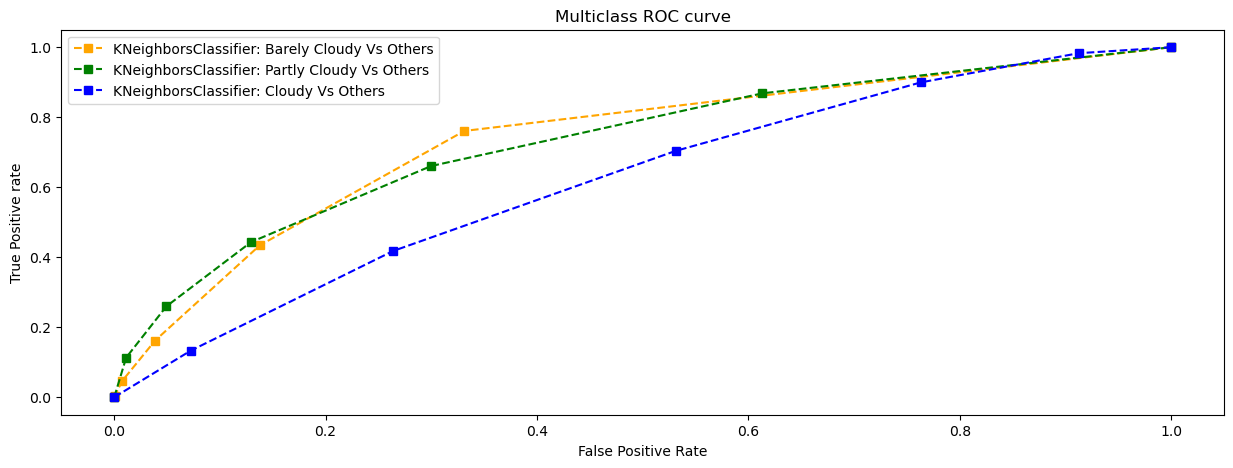

In [116]:
from sklearn.multiclass import OneVsRestClassifier
models = [RandomForestClassifier(), DecisionTreeClassifier(), KNeighborsClassifier()]
models_name = ['RandomForestClassifier', 'DecisionTreeClassifier', 'KNeighborsClassifier']
marker = ['*','^','s']
for j, mdl in enumerate(models):
    clf = OneVsRestClassifier(mdl)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    pred_prob = clf.predict_proba(X_test)
    pred_prob =  np.nan_to_num(pred_prob)

    # roc curve for classes
    fpr = {}
    tpr = {}
    thresh ={}

    n_class = 3

    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

    # plotting
    plt.figure(figsize=(15,5))
    plt.plot(fpr[0], tpr[0], linestyle='--', marker = marker[j],color='orange', label=models_name[j] + ': Barely Cloudy Vs Others')
    plt.plot(fpr[1], tpr[1], linestyle='--',marker = marker[j], color='green', label=models_name[j] + ': Partly Cloudy Vs Others')
    plt.plot(fpr[2], tpr[2], linestyle='--',marker = marker[j], color='blue', label=models_name[j] + ': Cloudy Vs Others')
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.savefig('Multiclass ROC',dpi=300); 

In [120]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:14<00:00,  2.03it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1460
[LightGBM] [Info] Number of data points in the train set: 7670, number of used features: 9
[LightGBM] [Info] Start training from score -2.071908
[LightGBM] [Info] Start training from score -1.151073
[LightGBM] [Info] Start training from score -0.583831


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
XGBClassifier                      0.73               0.65    None      0.72   
LGBMClassifier                     0.73               0.65    None      0.73   
BaggingClassifier                  0.70               0.64    None      0.70   
ExtraTreesClassifier               0.72               0.60    None      0.71   
RandomForestClassifier             0.71               0.60    None      0.70   
DecisionTreeClassifier             0.64               0.59    None      0.64   
KNeighborsClassifier               0.66               0.56    None      0.66   
ExtraTreeClassifier                0.63               0.56    None      0.63   
AdaBoostClassifier                 0.68               0.56    None      0.67   
LabelSpreading                     0.64               0.56    None      0.64   
LabelPropagation                   0.64               0.56    None      0.64   
QuadraticDiscriminantAnalysis      0.61               0.53    None      0.60   
NearestCentroid                    0.45               0.53    None      0.46   
LogisticRegression                 0.66               0.52    None      0.64   
GaussianNB                         0.53               0.51    None      0.54   
SVC                                0.68               0.49    None      0.63   
LinearDiscriminantAnalysis         0.66               0.49    None      0.62   
CalibratedClassifierCV             0.66               0.49    None      0.62   
LinearSVC                          0.66               0.48    None      0.61   
SGDClassifier                      0.65               0.48    None      0.61   
BernoulliNB                        0.54               0.48    None      0.55   
PassiveAggressiveClassifier        0.57               0.47    None      0.56   
RidgeClassifierCV                  0.65               0.47    None      0.60   
RidgeClassifier                    0.65               0.47    None      0.60   
Perceptron                         0.63               0.46    None      0.59   
DummyClassifier                    0.55               0.33    None      0.40   

                               Time Taken  
Model                                      
XGBClassifier                        0.23  
LGBMClassifier                       0.17  
BaggingClassifier                    0.43  
ExtraTreesClassifier                 1.01  
RandomForestClassifier               1.83  
DecisionTreeClassifier               0.09  
KNeighborsClassifier                 0.45  
ExtraTreeClassifier                  0.04  
AdaBoostClassifier                   0.32  
LabelSpreading                       2.40  
LabelPropagation                     1.88  
QuadraticDiscriminantAnalysis        0.03  
NearestCentroid                      0.02  
LogisticRegression                   0.07  
GaussianNB                           0.02  
SVC                                  4.12  
LinearDiscriminantAnalysis           0.04  
CalibratedClassifierCV               0.15  
LinearSVC                            0.66  
SGDClassifier                        0.09  
BernoulliNB                          0.03  
PassiveAggressiveClassifier          0.03  
RidgeClassifierCV                    0.03  
RidgeClassifier                      0.03  
Perceptron                           0.04  
DummyClassifier                      0.02

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'XGBClassifier'),
  Text(1, 0, 'LGBMClassifier'),
  Text(2, 0, 'BaggingClassifier'),
  Text(3, 0, 'ExtraTreesClassifier'),
  Text(4, 0, 'RandomForestClassifier'),
  Text(5, 0, 'DecisionTreeClassifier'),
  Text(6, 0, 'KNeighborsClassifier'),
  Text(7, 0, 'ExtraTreeClassifier'),
  Text(8, 0, 'AdaBoostClassifier'),
  Text(9, 0, 'LabelSpreading'),
  Text(10, 0, 'LabelPropagation'),
  Text(11, 0, 'QuadraticDiscriminantAnalysis'),
  Text(12, 0, 'NearestCentroid'),
  Text(13, 0, 'LogisticRegression'),
  Text(14, 0, 'GaussianNB'),
  Text(15, 0, 'SVC'),
  Text(16, 0, 'LinearDiscriminantAnalysis'),
  Text(17, 0, 'CalibratedClassifierCV'),
  Text(18, 0, 'LinearSVC'),
  Text(19, 0, 'SGDClassifier'),
  Text(20, 0, 'BernoulliNB'),
  Text(21, 0, 'PassiveAggressiveClassifier'),
  Text(22, 0, 'RidgeClassifierCV'),
  Text(23, 0, 'RidgeClassifier'),
  Text(24, 0, 'Percept

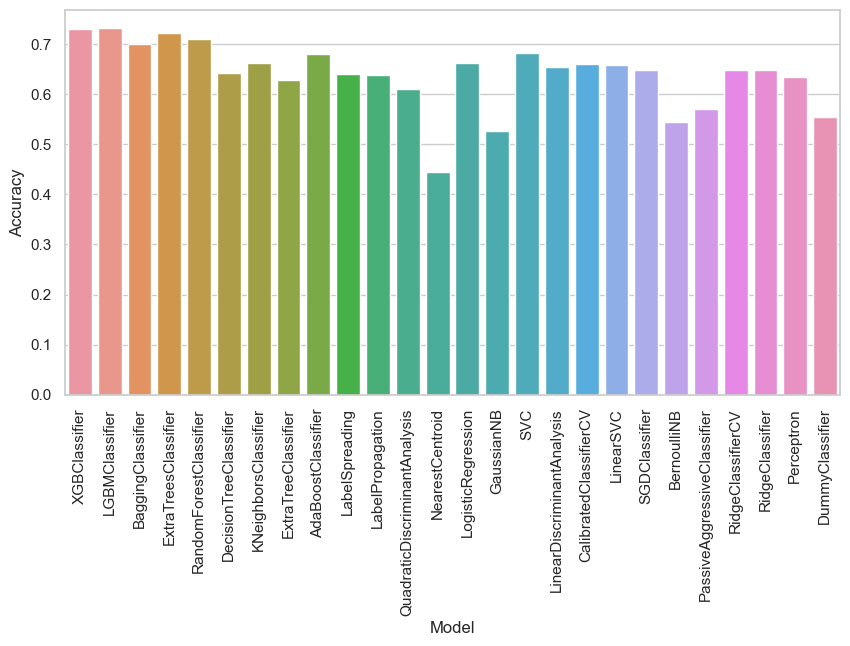

In [121]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=models.index, y="Accuracy", data=models)
plt.xticks(rotation=90)